# Quickstart

First install qlasskit using pip.

```pip install qlasskit```

We now define a qlassf function that sums two numbers:

In [1]:
from qlasskit import qlassf, Qint2


@qlassf
def sum_two_numbers(a: Qint2, b: Qint2) -> Qint2:
    return a + b

We can now export the resulting quantum circuit to any supported framework:

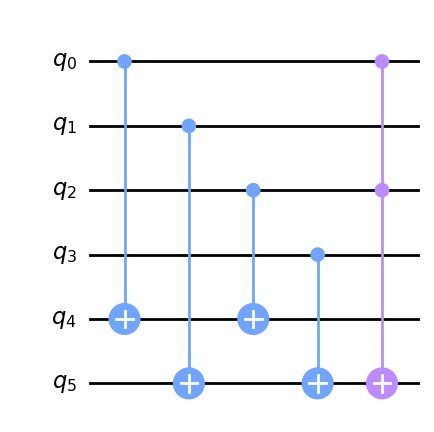

In [2]:
circuit = sum_two_numbers.export("qiskit")
circuit.draw("mpl")

The qlassf function can be also exported as a gate, if the destination framwork supports it. We can use `encode_input` and `decode_output` in order to convert from/to high level types of qlasskit without worrying about the binary representation.

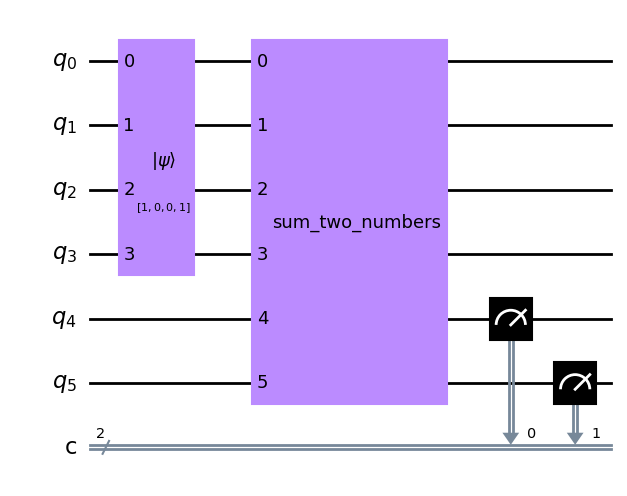

In [9]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(sum_two_numbers.num_qubits, len(sum_two_numbers.output_qubits))

qc.initialize(
    sum_two_numbers.encode_input(Qint2(1), Qint2(2)), sum_two_numbers.input_qubits
)
qc.append(sum_two_numbers.gate("qiskit"), sum_two_numbers.qubits)
qc.measure(sum_two_numbers.output_qubits, range(len(sum_two_numbers.output_qubits)))
qc.draw("mpl")

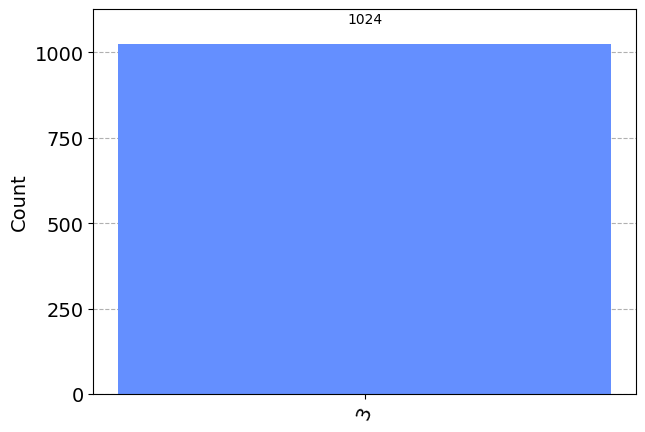

In [10]:
from qiskit import Aer, QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

simulator = Aer.get_backend("aer_simulator")
circ = transpile(qc, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)

counts_readable = sum_two_numbers.decode_counts(counts)
plot_histogram(counts_readable)